<a href="https://colab.research.google.com/github/skycatch-31/SpringFilter/blob/master/211_IRIS_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%9C%ED%94%8C%EB%A6%BF_%EC%A0%95%EB%8B%B5_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝, 딥러닝 IRIS템플릿

## > 머신러닝, 딥러닝 IRIS템플릿 목적
- 간단하게 쉽게 머신러닝, 딥러닝 모델링 만들기
- 잘 몰라도 아래 순서에 맞게 , 이런식으로 실행하면 되겠구나 느끼기
- 여러분이 처음 한다고 생각하고 템플릿 작성함

## > 모델링 프로세스
1. 데이터 가져오기
2. 데이터 분석
3. X , y 나누기
4. 머신러닝 모델링
5. 딥러닝 모델링
6. 딥러닝 성능 평가

---

# 1. 데이터 가져오기
- 먼저, 데이터가 있어야 모델링을 만들수 있다.
- 데이터 가져오는 방법에는 여러가지 있다.
 - 본인 데이터를 직접 올리는 방법
 - 기존에 제공하는 데이터 가져다 쓰는 방법

In [ ]:
# 필요한 라이브러리 가져오기
# 그냥 무조건 가져온다고 생각하자 : pandas, numpy, seaborn, matplotlib.pyplot
# seaborn 설치가 되어 있지 않으면 라이브러리는 설치 필요 : !pip install seaborn
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Seaborn에서 제공하는 데이터셋 확인하기
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

#### IRIS 데이터셋 가져오기

In [ ]:
# 많이 사용하는 데이터는 'iris' , 'tips' , 'titanic'
# 그중에서 iris 데이터셋 가져오기
# seaborn load_dataset('iris') 함수 활용 : 결과 iris 저장

iris = sns.load_dataset('iris')

In [ ]:
# 가져온 iris 데이터 앞 5개 확인 하기
# 자동으로 판다스 데이터프레임 형식으로 읽어짐

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![IRIS](https://blog.kakaocdn.net/dn/CJCHb/btqS1WqufxB/IMgacd6IXsCl2LLgm1lykK/img.png)

# 2. 데이터 분석
- 눈으로 데이터 수치를 보고 어떤 흐름인지 파악할수 있지만,
- 시각화를 통한다면 쉽게 흐름을 파악할수 있으니, 할수 있으면 사용해라.
- 여러분에게는 어려울수 있으니, 아, 이렇게 데이터를 가지고 시각화를 할수 있구나 느낀면 된다.

In [ ]:
# 간단하게 시각화해 보기
# 여러분은 잘 모르지만, 나중에 이렇게 시각화를 할수 있구나 알기

# value_counts 함수 이용해서 species 컬럼에 대한 분포 확인

iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: >

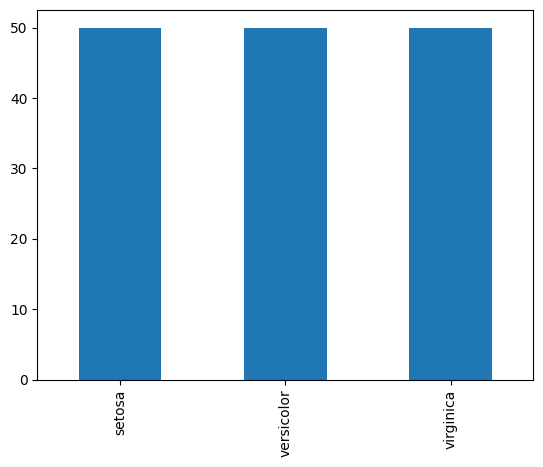

In [ ]:
# value_counts 함수 이용해서 species 컬럼에 대한 분포 확인값을 bar 차트 그리기

iris['species'].value_counts().plot(kind='bar')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

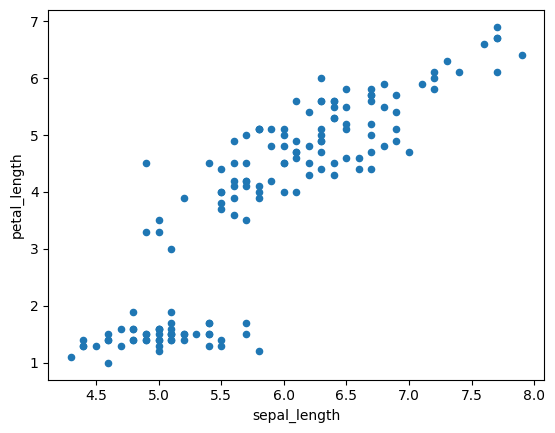

In [ ]:
# 판다스 plot 함수 활용해 산점도(scatter) 그래프 시각화해 보기
# 입력 : kind='scatter', x='sepal_length', y='petal_length'


iris.plot(kind='scatter', x='sepal_length', y='petal_length')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

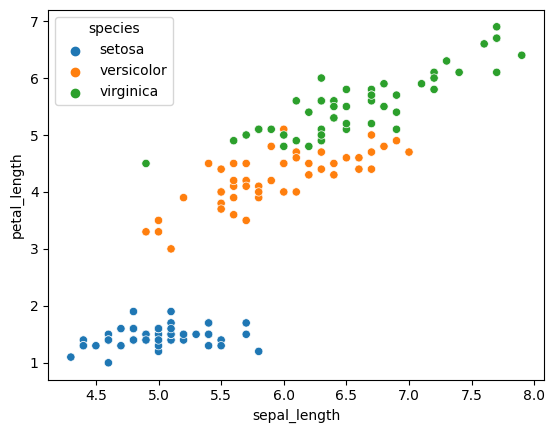

In [ ]:
# 이번에는 seaborn scatterplot 함수 활용해서 산점도 그리기
# 입력 : data=iris, x='sepal_length', y='petal_length', hue='species'

# 위와 똑같은 그래프지만, 붓꽃 종류로 분류해서 그래프
# 붓꽃 종류 3가지가 구분되어 보입니다.

sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species')

---

# 3. X, y 나누기
- 지도학습 경우 데이터와 정답이 있어야 합니다.
- 데이터에 해당하는 X와 정답에 해당하는 y가 있어야 합니다.
- 아래와 같이 판다스를 이용하면 X, y를 쉽게 나눌수 있어요

In [ ]:
# IRIS 데이터 뒤 5개 보기

iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# X 분리 : 판다스 drop 함수 활용
# 입력 : 'species', axis=1

X = iris.drop('species', axis=1)

In [ ]:
# 분리된 X 확인 : 데이터 타입이 데이터프레임 확인

X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# y 분리 : 'species' 컬럼값만 분리

y = iris['species']

In [ ]:
# 분리된 y 확인 : 데이터 타입이 Series 확인
# y 값이 문자열로 되어 있음 확인

y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
# Series, DataFrame 형태를 numpy array 변경하기
# 뒤쪽에서 타입이 맞지 않아서 에러 날수 있기 때문에
# X.values , y.values --> X , y 입력

X = X.values
y = y.values

In [ ]:
print(X[:2])
print(y[:2])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
['setosa' 'setosa']


In [ ]:
# y값이 숫자가 아니기에 컴퓨터가 잘 이해하지 못해 숫자로 변환
# setosa --> 0, versicolor --> 1, virginica --> 2 : LabelEncoding

from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. LabelEncoder 함수 정의 : le
# 2. y값에 대해 fit_transform 함수 이용해서 라벨인코딩 수행하고 다시 y에 저장
# 3. le.classes_ 출력해서 어떤 라벨들이 인코딩 되었는지 확인

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:
# y값들이 라벨인코딩되어 숫자로 표현됨 확인

y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 4. Train , Test 데이터셋 나누기
- 데이터를 가지고 모델을 학습 시키고 나서 모델 평가를 해야 하는데
- 모델이 학습한 데이터를 가지고 평가를 하지 않고
- 모델이 모르는 데이터로 평가를 해야 공정하고 평가 결과가 잘 나온다면 배포(일반화) 가능하다.

In [ ]:
# Train / Test 데이터셋 나누어주는 함수 : train_test_split

from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split 함수 활용
# 입력 : X, y
# Train : Test => 8 : 2  비율로 나누기 : test_size=0.2
# Train 데이터와 Test 데이터에 y가 쏠리지 않도록 하기 : stratify=y
# 매번 같은 결과 나오도록 값 고정 : random_state=42
# 결과 저장 : X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , stratify=y, random_state=42)

In [ ]:
# Train 과 Test 데이터셋 사이즈 확인
# X_train.shape, X_test.shape, y_train.shape, y_test.shape 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

---

# 5. 머신러닝 모델링
- DecisionTree 결정트리
- RandomForest 앙상블

#### DecisionTree

![결정트리](http://gavinln.github.io/blog-site/img/decision_trees/tree-depth-2.png)

In [ ]:
# DecisionTree 머신러닝 모델링
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 1. DecisionTreeClassifier 모델 정의 -> dt 저장
# 2. dt 모델 학습 : X_train, y_train
# 3. dt 모델 성능확인 : X_test, y_test

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9666666666666667

#### RandomForest

![RandomForest](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdDE2Rk%2FbtqvUzlulvU%2F6UbCGO8rHAhDJDCE3dyRr0%2Fimg.png)

In [ ]:
# RandomForest 머신러닝 모델링
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 1. RandomForestClassifier 모델 정의 -> rf 저장
# 2. rf 모델 학습 : X_train, y_train
# 3. rf 모델 성능확인 : X_test, y_test

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9333333333333333

In [ ]:
# X_test 첫라인 샘플 데이터 와 정답 출력
# setosa --> 0, versicolor --> 1, virginica --> 2

print(X_test[0:1])
print(y_test[0:1])

[[4.4 3.  1.3 0.2]]
[0]


In [ ]:
# X_test 첫라인 샘플 데이터을 모델 입력해서 예측하기
# rf 모델의 predict 함수 활용
# 입력 : X_test[0:1], 결과 : pred 저장
# pred 결과 출력

pred = rf.predict(X_test[0:1])
print(pred)

[0]


---

# 6. 딥러닝 모델링

In [ ]:
# 딥러닝 필요한 라이브러리 가져오기

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

![DNN](https://t1.daumcdn.net/cfile/tistory/9976DE33598420B531)

In [ ]:
# Sequential 모델 만들기 --> model 변수 저장
# input layer : (4, )
# hidden layer : 6 unit , activation='relu'
# output layer : 3 unit , activation

model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

In [ ]:
# 모델 컴파일 : compile
# loss='sparse_categorical_crossentropy'
# optimizer='adam'
# metrics=['accuracy']

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 학습 : fit
# X_train, y_train, epochs=10, batch_size=8
# 학습결과 저장 : history


history = model.fit(X_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 2.9592 - accuracy: 0.3333
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 2.4548 - accuracy: 0.4000
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 2.0383 - accuracy: 0.6167
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 1.6884 - accuracy: 0.6667
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 1.3931 - accuracy: 0.6667
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 1.1965 - accuracy: 0.6667
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0305 - accuracy: 0.6667
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.9262 - accuracy: 0.6667
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.6667
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8091 - accuracy: 0.6667


### 생각보자 정확도가 높지않네.. 좀더 공부시키자..

In [ ]:
# epochs 횟수 증가하여 모델 학습 : fit
# X_train, y_train, epochs=50, batch_size=8 --> epochs 50으로 변경
# 학습결과 저장 : history

history = model.fit(X_train, y_train, epochs=50, batch_size=8)

Epoch 1/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7732 - accuracy: 0.6667
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7462 - accuracy: 0.6667
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.6667
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.6667
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.6667
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6750
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6917
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7667
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.8250
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.8750
Epoch 11/50
15/15 [

### 이번에 모델 학습시 각 에포크 때마다 안본 데이터(Test)로 모델 평가해 보자!!



In [ ]:
# epochs 횟수 증가하여 모델 학습 : fit
# X_train, y_train, epochs=50, batch_size=8 , validation_data=(X_test, y_test)
# 학습결과 저장 : history

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
15/15 [==============================] - 0s 18ms/step - loss: 0.3475 - accuracy: 0.9667 - val_loss: 0.3501 - val_accuracy: 0.9667
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3431 - accuracy: 0.9667 - val_loss: 0.3459 - val_accuracy: 0.9667
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3390 - accuracy: 0.9667 - val_loss: 0.3419 - val_accuracy: 0.9667
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.9667 - val_loss: 0.3377 - val_accuracy: 0.9667
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3301 - accuracy: 0.9667 - val_loss: 0.3338 - val_accuracy: 0.9667
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3262 - accuracy: 0.9667 - val_loss: 0.3300 - val_accuracy: 0.9667
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3226 - accuracy: 0.9667 - val_loss: 0.3262 - val_accuracy: 0.9667
Epoch 8/50
15/15 [=

---

# 7. 딥러닝 성능 평가

In [ ]:
# 모델 학습 정보

history.history

{'loss': [0.3475159704685211,
  0.3431180715560913,
  0.33899977803230286,
  0.3342430889606476,
  0.33010825514793396,
  0.3261609375476837,
  0.3225550651550293,
  0.31918665766716003,
  0.3148781359195709,
  0.3118138313293457,
  0.30774471163749695,
  0.30339720845222473,
  0.2999865710735321,
  0.29632043838500977,
  0.2958836257457733,
  0.2890031933784485,
  0.2883126139640808,
  0.28292953968048096,
  0.2800126373767853,
  0.2764897644519806,
  0.27533218264579773,
  0.27229607105255127,
  0.26857563853263855,
  0.26467713713645935,
  0.2618635594844818,
  0.2593277096748352,
  0.25653013586997986,
  0.25368356704711914,
  0.2512003183364868,
  0.24888449907302856,
  0.2487463355064392,
  0.24487552046775818,
  0.24230614304542542,
  0.23925895988941193,
  0.23734745383262634,
  0.2353346049785614,
  0.23190490901470184,
  0.23172280192375183,
  0.22732171416282654,
  0.2270229607820511,
  0.2234153002500534,
  0.22166119515895844,
  0.21993611752986908,
  0.21774369478225708,


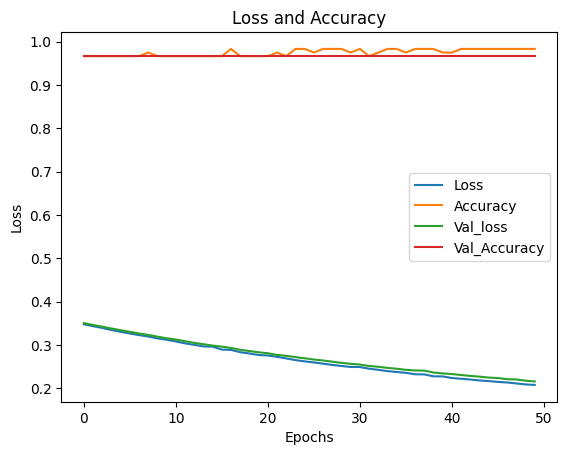

In [ ]:
# matplotlib 이용하여 그래프 그리기
# 1. plot 그리기 : 입력  history.history['loss'] , history.history['val_loss']
# 2. plot 그리기 : 입력  history.history['accuracy'] , history.history['val_accuracy']
# 3. title : 'Loss and Accuracy'
# 4. xlabel : "Epochs"
# 5. ylabel : "Loss"
# 6. legend : ["Loss", "Accuracy"]
# 7. plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Loss and Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Accuracy", "Val_loss", "Val_Accuracy"])
plt.show()